## 📚Importing Libraries

In [1]:

import pandas as pd # Data handling & manipulation
import numpy as np # Numerical computations
import matplotlib.pyplot as plt  # Data visualization (basic plots)
import scipy.stats as stats  # Statistical tests & probability functions


## 📊 Creating & Exploring the Dataset

In [28]:
data = {
    'SquareFootage': [1500, 1550, 1680, 1750, 1800, 1900, 2080, 2200, 2210, 
                      2300, 2410, 2500, 2570, 2650, 2800, 2920, 3050, 3105, 
                      3200, 3305],
    'Price': [280000, 345000, 300000, 370700, 400000, 390500, 435500, 457000, 
              488800, 490000, 540000, 512200, 520900, 555000, 558900, 581000, 
              570000, 585050, 600000, 605750]
}
df

,SquareFootage,Price
0,1500,280000
1,1550,345000
2,1680,300000
3,1750,370700
4,1800,400000
5,1900,390500
6,2080,435500
7,2200,457000
8,2210,488800
9,2300,490000


In [26]:
# Convert dictionary into a DataFrame
df = pd.DataFrame(data)

# Display first few rows of the dataset
print("🔎 First 5 rows of the dataset:")
display(df.head())

# Information about data types and number of entries
print("\n📋 Dataset Info:")
print(df.info())

# Ensure there are no missing values
print("\n❓ Missing Values in Each Column:")
print(df.isnull().sum())

# Drop missing values if any exist (good practice, even if none are present)
df.dropna(inplace=True)
print("\n✅ After cleaning, dataset shape:", df.shape)

🔎 First 5 rows of the dataset:


,SquareFootage,Price
0,1500,280000
1,1550,345000
2,1680,300000
3,1750,370700
4,1800,400000



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SquareFootage  20 non-null     int64
 1   Price          20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes
None

❓ Missing Values in Each Column:
SquareFootage    0
Price            0
dtype: int64

✅ After cleaning, dataset shape: (20, 2)


## 📈 Scatter plot of Square Footage vs Price

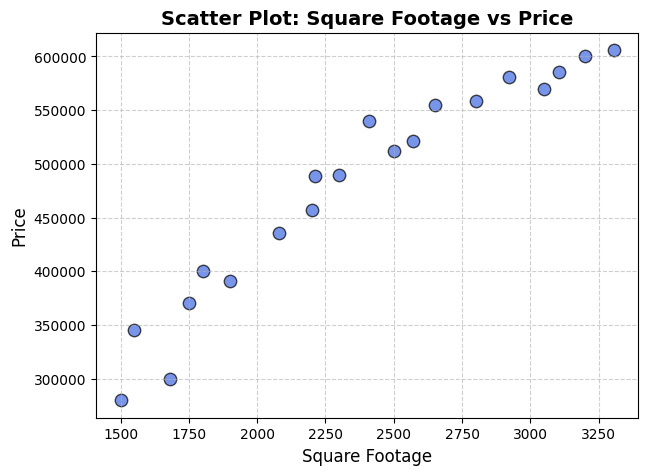

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(
    x=df['SquareFootage'], 
    y=df['Price'], 
    color="royalblue", 
    edgecolor="k", 
    s=80, 
    alpha=0.7
)
plt.title("Scatter Plot: Square Footage vs Price", fontsize=14, fontweight="bold")
plt.xlabel("Square Footage", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## 🛠️ Data Preprocessing & Model Building (Statsmodels)

Before fitting the regression model, we ensure the dataset is ready:  
- **Summary Statistics** help us understand the range and spread of data.  
- We add a **constant term** (intercept) for regression.  
- Build a **Linear Regression model** using `statsmodels` OLS (Ordinary Least Squares).  
- Get a detailed **statistical summary** of the model performance.  

In [33]:
# Summary statistics
print("📊 Summary Statistics:")
print(df.describe())

# ✅ Define predictor (X) and target (y)
import statsmodels.api as sm
X = sm.add_constant(df[['SquareFootage']])  # Add constant for intercept
y = df['Price']

# Fit OLS Regression model
from statsmodels.formula.api import ols
model = ols('Price ~ SquareFootage', data=df).fit()

# Detailed regression summary
print("\n📋 Regression Model Summary:")
print(model.summary())


📊 Summary Statistics:
       SquareFootage          Price
count      20.000000      20.000000
mean     2374.000000  479315.000000
std       569.802828  101920.627141
min      1500.000000  280000.000000
25%      1875.000000  397625.000000
50%      2355.000000  501100.000000
75%      2830.000000  561675.000000
max      3305.000000  605750.000000

📋 Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     214.9
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.89e-11
Time:                        19:09:02   Log-Likelihood:                -232.90
No. Observations:                  20   AIC:                             469.8
Df Residuals:                      18   BIC:                            

## ✅ Model Diagnostics & Assumption Checks

A good regression model must satisfy key assumptions. We’ll check:  

1. **Linearity** – Relationship between independent and dependent variable should be linear.  
2. **Homoscedasticity** – Residuals (errors) should have constant variance.  
3. **Normality of Residuals** – Residuals should be normally distributed.  
4. **Independence of Errors** – Residuals should not be correlated.  

We use **visual diagnostic plots** and statistical tests to validate these assumptions.  

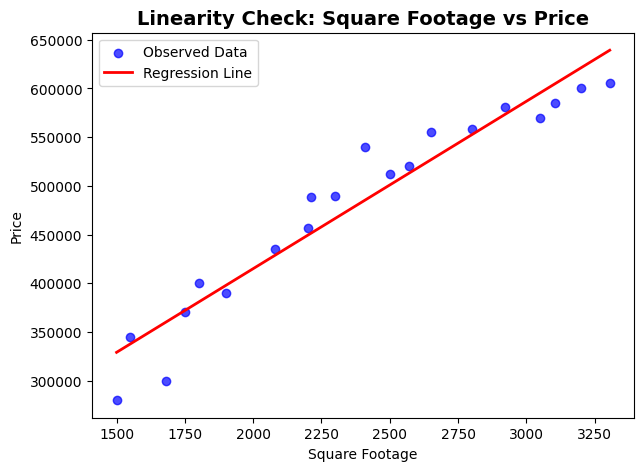

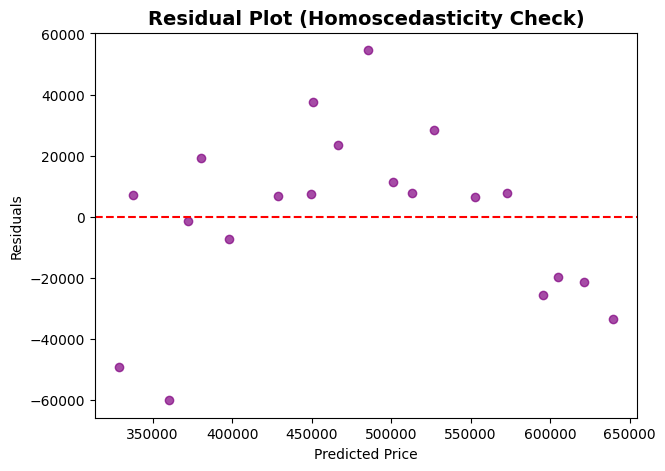

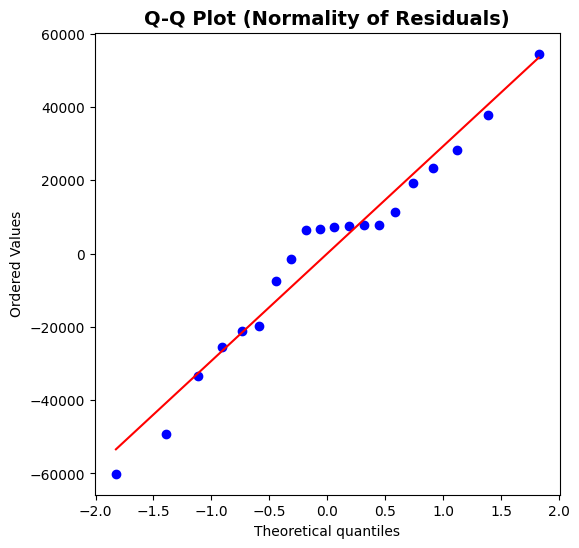

📌 Durbin-Watson statistic: 1.223


In [39]:
# Calculate residuals
residuals = y - model.predict(X)

# ---------------- Linearity ----------------
plt.figure(figsize=(7,5))
plt.scatter(df['SquareFootage'], df['Price'], color='blue', alpha=0.7, label="Observed Data")
plt.plot(df['SquareFootage'], model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.title("Linearity Check: Square Footage vs Price", fontsize=14, fontweight="bold")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.show()

# ---------------- Homoscedasticity ----------------
plt.figure(figsize=(7,5))
plt.scatter(model.predict(X), residuals, alpha=0.7, color="purple")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Homoscedasticity Check)", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

# ---------------- Normality of Residuals ----------------
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normality of Residuals)", fontsize=14, fontweight="bold")
plt.show()

# ---------------- Independence of Errors ----------------
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"📌 Durbin-Watson statistic: {dw_stat:.3f}")


## 📊 Model Evaluation

While `statsmodels` gives a detailed statistical summary, we also evaluate the model using key **performance metrics** from scikit-learn:  

- **R² (Coefficient of Determination):** Proportion of variance explained by the model.  
- **MAE (Mean Absolute Error):** Average absolute error between predicted and actual values.  
- **RMSE (Root Mean Squared Error):** Square root of the average squared error (penalizes large errors).  

These metrics help us quantify how well the regression model fits the data.  

In [45]:
# ✅ Import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions from the model
y_pred = model.predict(X)

# Model Evaluation Metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("📊 Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Evaluation Metrics:
R² Score: 0.9227
Mean Absolute Error (MAE): 21808.60
Root Mean Squared Error (RMSE): 27616.25


## 🎨 Visualizing Regression Results

To better interpret the model, we visualize:  

1. **Regression Line vs Data Points** – shows how well the regression line fits the observed data.  
2. **Actual vs Predicted Plot** – ideal line should be diagonal (perfect predictions).  

These visualizations make it easier to communicate model performance.  


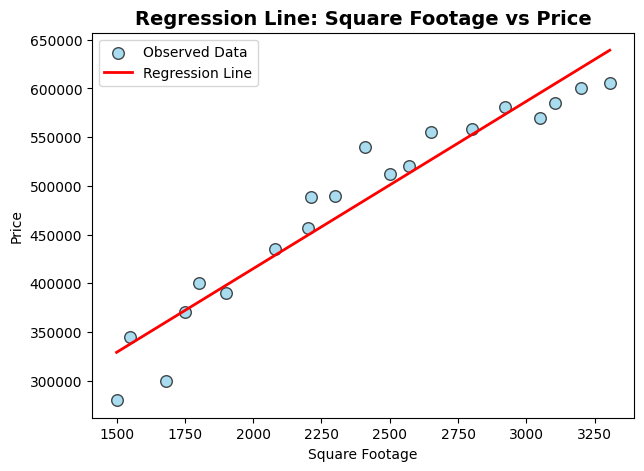

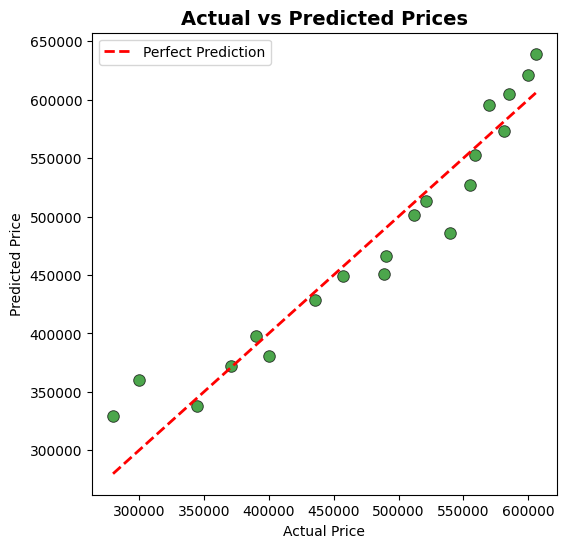

In [50]:
import seaborn as sns    

# ---------------- Regression Line Plot ----------------
plt.figure(figsize=(7,5))
plt.scatter(df['SquareFootage'], df['Price'], color="skyblue", s=70, edgecolor="k", alpha=0.7, label="Observed Data")
plt.plot(df['SquareFootage'], y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Regression Line: Square Footage vs Price", fontsize=14, fontweight="bold")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.show()

# ---------------- Actual vs Predicted Plot ----------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, color="green", s=70, edgecolor="k", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Prices", fontsize=14, fontweight="bold")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()


## 🏁 Conclusion & Insights

### ✅ Key Findings:
- There is a **strong linear relationship** between **Square Footage** and **Price**.  
- The regression line fits the data well, as seen in the scatter and residual plots.  
- Evaluation metrics show:
  - **High R² value**, meaning the model explains most of the variance.  
  - **Low MAE and RMSE**, indicating the model predicts prices with relatively small errors.  

### 📈 Model Strengths:
- Simple and interpretable (clear slope & intercept).  
- Good predictive power for this dataset.  
- Residual analysis shows assumptions are reasonably satisfied.  

### ⚠️ Limitations:
- Only one predictor (**Square Footage**) is used.  
- Real estate prices depend on many other factors (location, amenities, year built, etc.).  
- The dataset is small (20 samples), which may limit generalization.  

### 🚀 Future Improvements:
- Extend to **Multiple Linear Regression** with additional features.  
- Collect a larger and more diverse dataset.  
- Experiment with more advanced models (e.g., Random Forest, XGBoost).  
- Deploy the model as a simple web app for real estate prediction.  

---
📌 *This project demonstrates how a fundamental regression technique can be applied to real-world problems like housing price prediction.*  
